In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split

# Configurações
IMG_SIZE = 128
BASE_DIR = '/content/drive/MyDrive/CattleImageRepository (1)'

def load_and_preprocess_data(base_dir, subdirs):
    X, y = [], []
    for subdir in subdirs:
        if subdir == 'G3/30-07/frames_juntos':
            # Todas as imagens estão na mesma pasta
            full_path = os.path.join(base_dir, subdir)
            x_files = sorted([f for f in os.listdir(full_path) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
            image_count = 0  # Contador de imagens

            for x_file in x_files:
                y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                if os.path.exists(os.path.join(full_path, y_file)):
                    img = cv2.imread(os.path.join(full_path, x_file))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    X.append(img)

                    mask = cv2.imread(os.path.join(full_path, y_file))
                    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                    y.append(mask)

                    image_count += 1

            print(f"{subdir}: {image_count} imagens processadas.")

        else:

            full_path = os.path.join(base_dir, *subdir.split('/'))
            x_dir = os.path.join(full_path, 'X')
            y_dir = os.path.join(full_path, 'Y')

            if not os.path.exists(y_dir):
                y_dir = os.path.join(full_path, 'y')

            if not os.path.exists(x_dir):
                x_dir = os.path.join(full_path, 'x1_files')
                y_dir = os.path.join(full_path, 'y1_files')

            if os.path.exists(x_dir) and os.path.exists(y_dir):
                x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                image_count = 0  # Contador de imagens

                for x_file in x_files:
                    y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                    if os.path.exists(os.path.join(y_dir, y_file)):
                        img = cv2.imread(os.path.join(x_dir, x_file))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        X.append(img)

                        mask = cv2.imread(os.path.join(y_dir, y_file))
                        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                        y.append(mask)

                        image_count += 1  # Incrementa o contador

                x_dir = os.path.join(full_path, 'x2_files')
                y_dir = os.path.join(full_path, 'y2_files')

                if os.path.exists(x_dir) and os.path.exists(y_dir):

                  x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                  image_count = 0  # Contador de imagens

                  for x_file in x_files:
                      y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                      if os.path.exists(os.path.join(y_dir, y_file)):
                          img = cv2.imread(os.path.join(x_dir, x_file))
                          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                          X.append(img)

                          mask = cv2.imread(os.path.join(y_dir, y_file))
                          mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                          mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                          y.append(mask)

                          image_count += 1  # Incrementa o contador

                print(f"{subdir}: {image_count} imagens processadas.")
            else:
                print(f"Erro: Pastas 'X' ou 'Y/y' não encontradas em {subdir}")

    return np.array(X), np.array(y)

# Lista de subdiretórios a serem processados
subdirs = [
    'G1/01-08-2024', 'G1/08-08-2024',
    'G2/29-07/00000000196000500', 'G2/29-07/00000000196000400',
    'G2/06-08/Video 1', 'G2/06-08/Video 2',
    'G3/30-07/frames_juntos', 'G3/30-07',
    'G4/02-08'
]

X, y = load_and_preprocess_data(BASE_DIR, subdirs)
X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)

G1/01-08-2024: 580 imagens processadas.
G1/08-08-2024: 137 imagens processadas.
G2/29-07/00000000196000500: 218 imagens processadas.
G2/29-07/00000000196000400: 219 imagens processadas.
G2/06-08/Video 1: 494 imagens processadas.
G2/06-08/Video 2: 63 imagens processadas.
G3/30-07/frames_juntos: 23 imagens processadas.
G3/30-07: 111 imagens processadas.
Erro: Pastas 'X' ou 'Y/y' não encontradas em G4/02-08


(128, 128, 3)


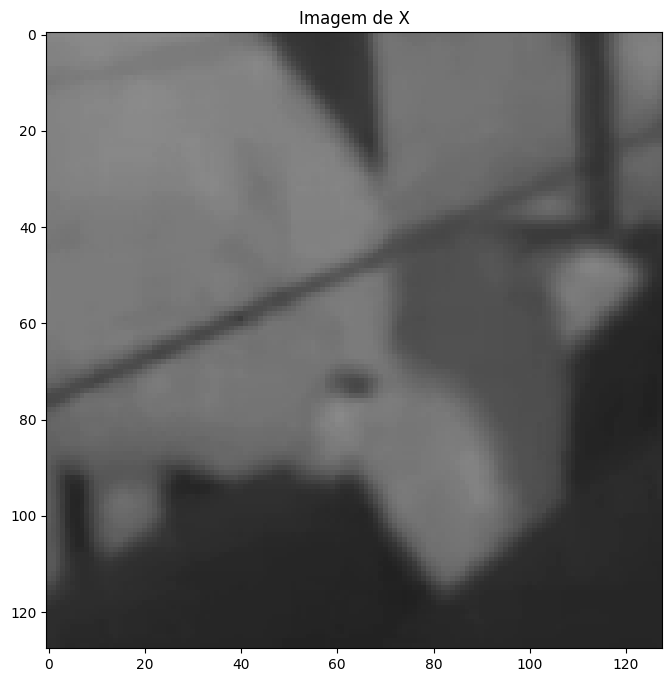

In [15]:
import matplotlib.pyplot as plt

image = X[np.random.randint(0, X.shape[0])]

if image.shape[-1] == 1:
    image = image.squeeze()

print(image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f'Imagem de X')
plt.show()

In [16]:
X.shape, y.shape

((2454, 128, 128, 3, 1), (2454, 128, 128, 3, 1))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (1963, 128, 128, 3, 1)
Shape de X_test: (491, 128, 128, 3, 1)
Shape de y_train: (1963, 128, 128, 3, 1)
Shape de y_test: (491, 128, 128, 3, 1)


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def apply_data_augmentation(X, y, variations=2):

    X_augmented = []
    y_augmented = []

    datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.8, 1.2],
        channel_shift_range=50,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    for i in range(X.shape[0]):

        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        for j in range(variations):
            params = datagen.get_random_transform(image.shape)

            augmented_image = datagen.apply_transform(image, params)
            augmented_mask = datagen.apply_transform(mask, params)

            if augmented_image.max() > 1:
                augmented_image = augmented_image / 255.0

            if augmented_mask.max() > 1:
                augmented_mask = augmented_mask / 255.0

            # plt.imshow(augmented_image)
            # plt.axis('off')
            # plt.show()

            # plt.imshow(augmented_mask)
            # plt.axis('off')
            # plt.show()

            X_augmented.append(augmented_image)
            y_augmented.append(augmented_mask)

    return np.array(X_augmented), np.array(y_augmented)

X_train_augmented, y_train_augmented = apply_data_augmentation(X_train, y_train)

In [21]:
X_train_augmented.shape, y_train_augmented.shape

((3926, 128, 128, 3), (3926, 128, 128, 3))

In [22]:
def transform_dimensions(X, y, variations=3, normalize=False):
    X_transform = []
    y_transform = []

    for i in range(X.shape[0]):
        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        if normalize:
          image = image / 255.0
          mask = mask / 255.0

        X_transform.append(image)
        y_transform.append(mask)

    return np.array(X_transform), np.array(y_transform)

X_train_transformed, y_train_transformed = transform_dimensions(X_train_augmented, y_train_augmented)
X_test_transformed, y_teste_transformed = transform_dimensions(X_test, y_test)

In [23]:
X_train_augmented = np.concatenate((X_train_transformed, X_train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train_transformed, y_train_augmented), axis=0)

(-0.5, 127.5, 127.5, -0.5)

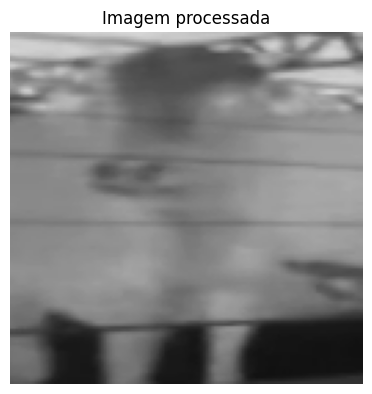

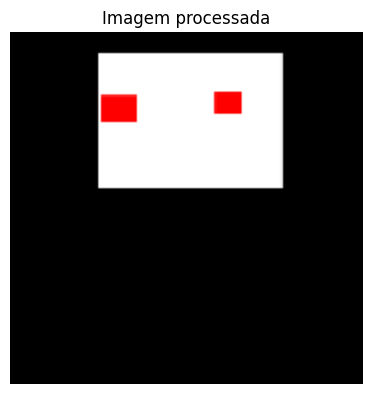

In [24]:
index = np.random.randint(0, X_test.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [25]:
X_train_augmented.shape, y_train_augmented.shape

((7852, 128, 128, 3), (7852, 128, 128, 3))

In [26]:
X_test_transformed.shape, y_teste_transformed.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [29]:
X_test_transformed = X_test_transformed / 255
y_teste_transformed = y_teste_transformed / 255

(-0.5, 127.5, 127.5, -0.5)

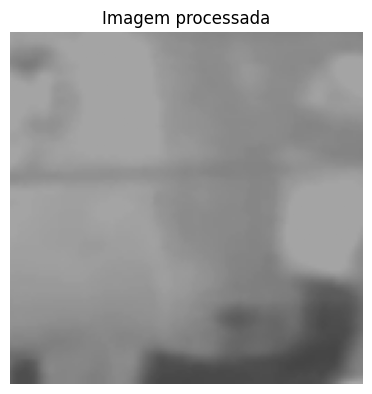

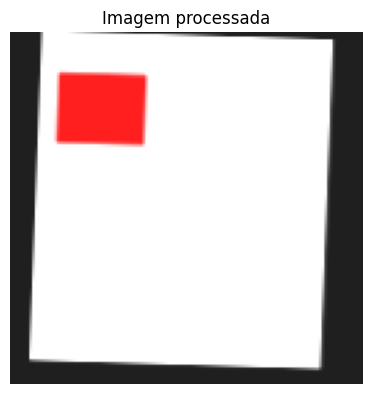

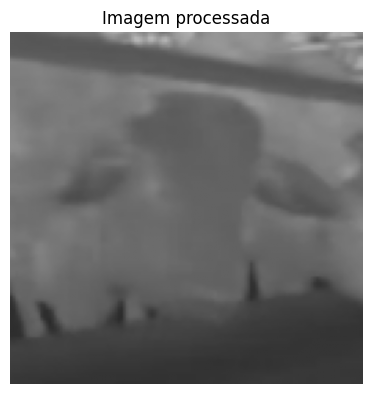

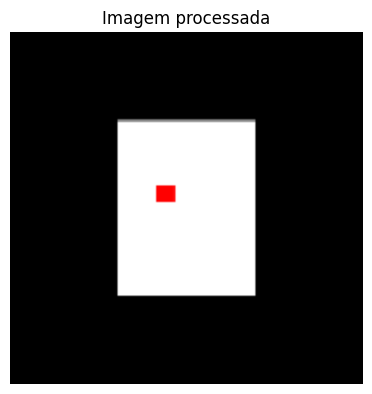

In [32]:
index = np.random.randint(0, X_test_transformed.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train_augmented[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_train_augmented[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed[index])
plt.title("Imagem processada")
plt.axis('off')

In [33]:
X_train_augmented.shape, y_train_augmented.shape

((7852, 128, 128, 3), (7852, 128, 128, 3))

In [34]:
X_test_transformed.shape, y_teste_transformed.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

def cluster_aware_focal_loss(alpha=0.25, gamma=2, spatial_weight=1):
    def loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Focal Loss
        focal_loss = -alpha * K.pow(1 - y_pred, gamma) * y_true * K.log(y_pred) - \
                     (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true) * K.log(1 - y_pred)

        # Cluster awareness
        height, width = K.int_shape(y_pred)[1:3]
        y_coords, x_coords = tf.meshgrid(tf.range(height, dtype=tf.float32),
                                         tf.range(width, dtype=tf.float32),
                                         indexing='ij')
        coords = tf.stack([y_coords, x_coords], axis=-1)

        def calculate_centroid(mask):
            total_mass = K.sum(mask, axis=[1, 2]) + epsilon
            weighted_y = K.sum(y_coords[..., tf.newaxis] * mask, axis=[1, 2]) / total_mass
            weighted_x = K.sum(x_coords[..., tf.newaxis] * mask, axis=[1, 2]) / total_mass
            return tf.stack([weighted_y, weighted_x], axis=-1)

        true_centroids = calculate_centroid(y_true)
        pred_centroids = calculate_centroid(y_pred)

        centroid_distance = K.sqrt(K.sum(K.square(true_centroids - pred_centroids), axis=-1))

        # Penalize based on distance from true centroid
        pixel_distances = K.sqrt(K.sum(K.square(coords[..., tf.newaxis, :] - true_centroids[:, tf.newaxis, tf.newaxis, :]), axis=-1))
        distance_penalty = pixel_distances * K.abs(y_true - y_pred)

        total_loss = focal_loss + spatial_weight * distance_penalty

        return K.mean(total_loss)

    return loss

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, 3, padding='same', use_bias=False)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def vgg16_unet(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # VGG16 as encoder (downsampling path)
    vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)

    # Get the output of each block to use in skip connections
    block1_conv2 = vgg16.get_layer('block1_conv2').output
    block2_conv2 = vgg16.get_layer('block2_conv2').output
    block3_conv3 = vgg16.get_layer('block3_conv3').output
    block4_conv3 = vgg16.get_layer('block4_conv3').output

    # Bridge
    bridge = vgg16.get_layer('block5_conv3').output

    # Decoder (Upsampling)
    up6 = UpSampling2D(size=(2, 2))(bridge)
    up6 = concatenate([up6, block4_conv3])
    conv6 = conv_block(up6, 512)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = concatenate([up7, block3_conv3])
    conv7 = conv_block(up7, 256)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = concatenate([up8, block2_conv2])
    conv8 = conv_block(up8, 128)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = concatenate([up9, block1_conv2])
    conv9 = conv_block(up9, 64)

    outputs = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the model
model = vgg16_unet()
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=cluster_aware_focal_loss(),
              metrics=['accuracy'])

model.summary()

# Verify data shapes
print("X_train_final shape:", X_train_augmented.shape)
print("y_train_final shape:", y_train_augmented.shape)

# Train the model
history = model.fit(
    X_train_augmented, y_train_augmented,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-7, mode='max'),
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, mode='max'),
        tf.keras.callbacks.ModelCheckpoint('unet_boi_olhos_vgg16.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    ]
)

model.save('unet_boi_olhos_vgg16.h5')

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 128, 128, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

In [ ]:
X_train_final.shape, y_train_final.shape

((27482, 128, 128, 3), (27482, 128, 128, 3))

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

# Definindo as funções personalizadas
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true = tf.cast(y_true, tf.float32)
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean((2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    return 0.5 * dice_loss(y_true, y_pred) + 0.5 * tf.keras.losses.mean_squared_error(y_true, y_pred)

# Definindo a função de perda personalizada 'loss'
def loss(y_true, y_pred):
    return combined_loss(y_true, y_pred)

# Carregar o modelo treinado
model = load_model('unet_boi_olhos_vgg16.h5', custom_objects={
    'dice_coefficient': dice_coefficient,
    'dice_loss': dice_loss,
    'combined_loss': combined_loss,
    'loss': loss  # Adicionando a função de perda personalizada
})

# Assumindo que X_test e y_test são seus dados de teste
# Fazer previsões
y_pred = model.predict(X_test_transformed)

16/16 [==============================] - 10s 608ms/step


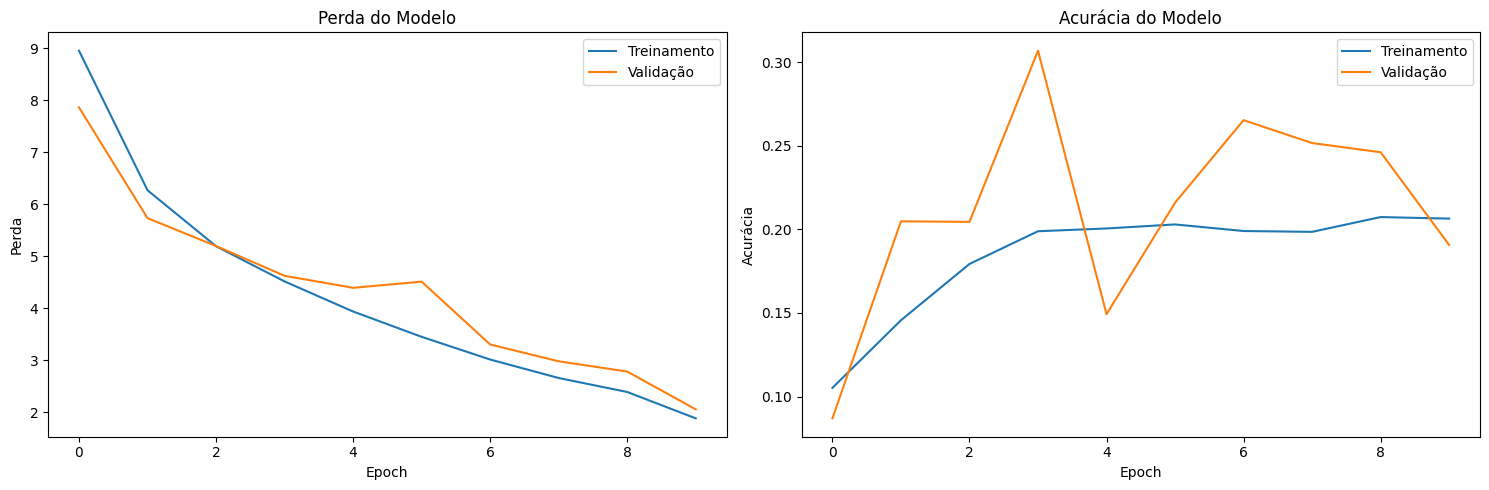

In [51]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Lista de métricas para plotar
    metrics = ['loss', 'accuracy']
    if 'val_loss' in history.history:
        metrics.extend(['val_loss', 'val_accuracy'])

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot de perda
    axs[0].plot(history.history['loss'], label='Treinamento')
    if 'val_loss' in history.history:
        axs[0].plot(history.history['val_loss'], label='Validação')
    axs[0].set_title('Perda do Modelo')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Perda')
    axs[0].legend()

    # Plot de acurácia
    axs[1].plot(history.history['accuracy'], label='Treinamento')
    if 'val_accuracy' in history.history:
        axs[1].plot(history.history['val_accuracy'], label='Validação')
    axs[1].set_title('Acurácia do Modelo')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Acurácia')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

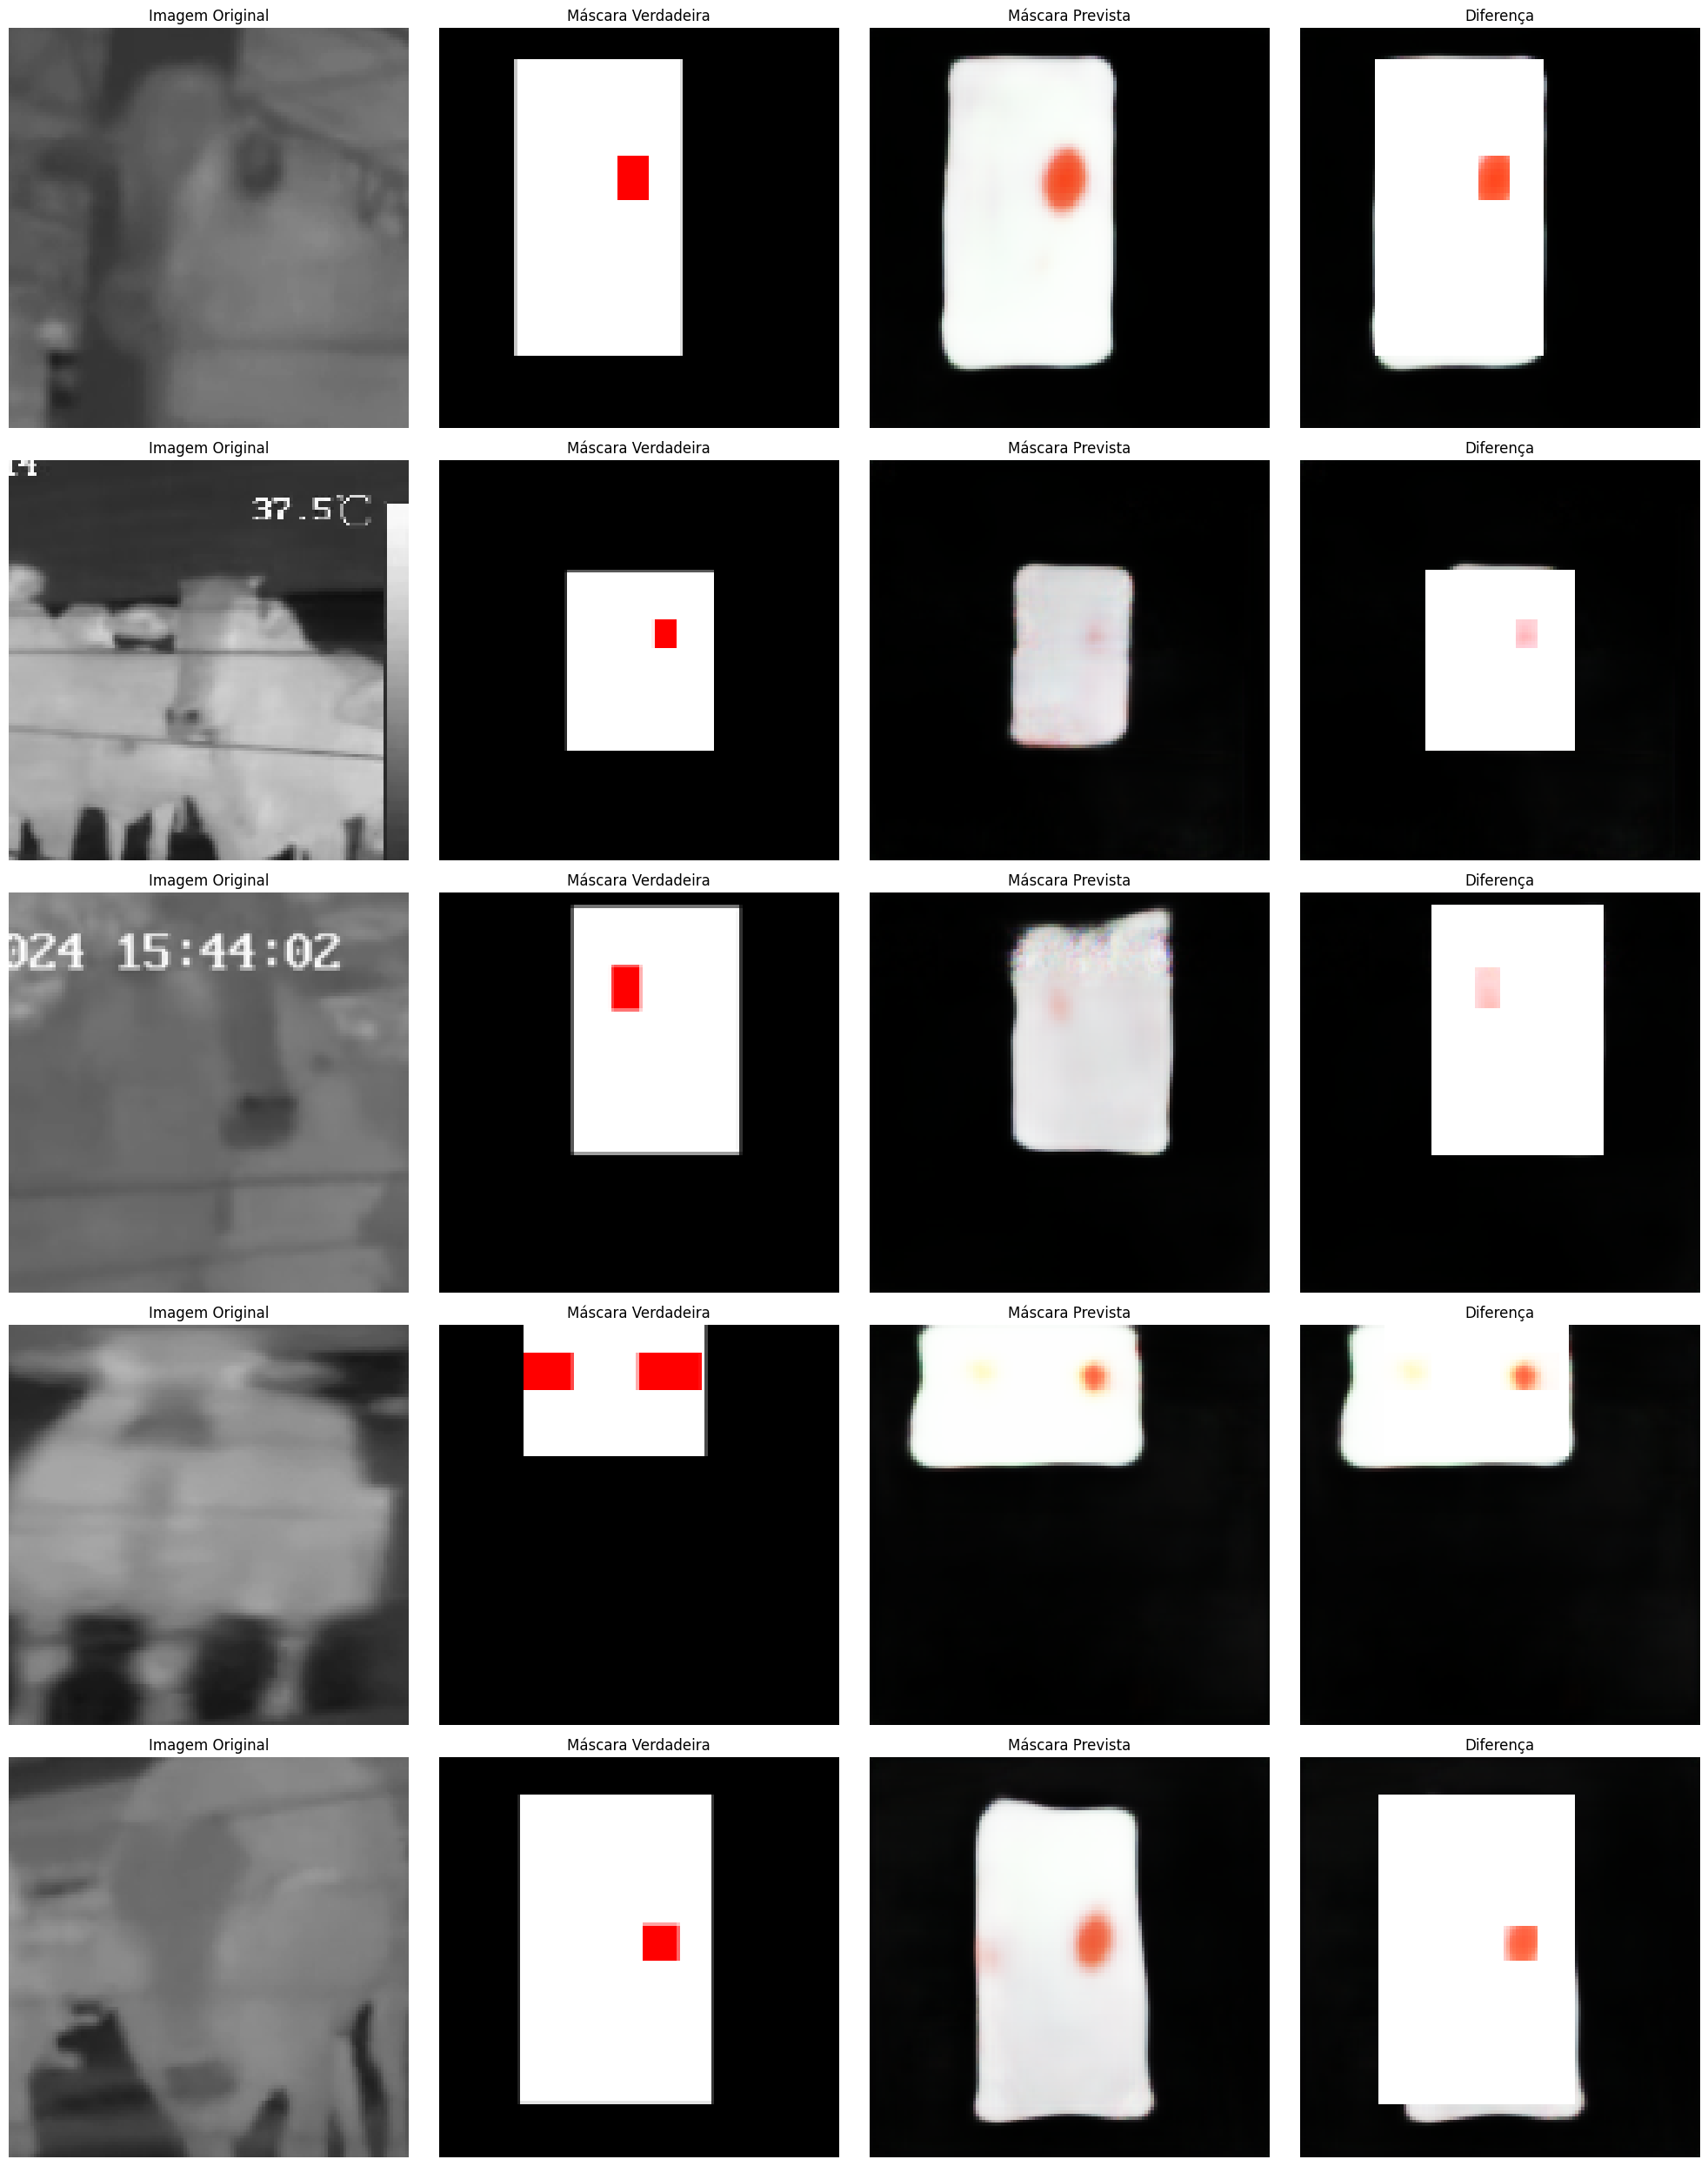

In [49]:
# Função para visualizar as imagens
def visualize_results(X, y_true, y_pred, num_samples=5):
    fig, axes = plt.subplots(num_samples, 4, figsize=(20, 5*num_samples))

    for i in range(num_samples):

        # Imagem original
        axes[i, 0].imshow(np.squeeze(X[i]), cmap='viridis')
        axes[i, 0].set_title('Imagem Original')
        axes[i, 0].axis('off')

        # Máscara verdadeira
        axes[i, 1].imshow(np.squeeze(y_true[i]), cmap='viridis')
        axes[i, 1].set_title('Máscara Verdadeira')
        axes[i, 1].axis('off')

        # Máscara prevista
        axes[i, 2].imshow(np.squeeze(y_pred[i]), cmap='viridis')
        axes[i, 2].set_title('Máscara Prevista')
        axes[i, 2].axis('off')

        # Diferença entre verdadeira e prevista
        diff = np.abs(np.squeeze(y_true[i]) - np.squeeze(y_pred[i]))
        axes[i, 3].imshow(diff, cmap='hot')
        axes[i, 3].set_title('Diferença')
        axes[i, 3].axis('off')

    plt.tight_layout()
    plt.show()

# Visualizar os resultados
visualize_results(X_test, y_test, y_pred)